<a href="https://colab.research.google.com/github/sks971101/sks971101/blob/main/kbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅볼 vs 스몰볼

**빅볼**  
- 작전(도루, 번트) 최소화 하고 장타(2루타 이상의 안타)에 비중을 두는 야구  
- 특징 : 낮은 도루 시도, 번트, 비교적 높은 장타율, 홈런, 삼진율, 병살타율  

**스몰볼**  
- 작전(번트, 도루)을 통해 1점을 확실하게 짜내는 야구  
- 특징 : 빈번한 도루시도, 번트  

**빅볼 vs 스몰볼에 대한 논쟁 치열**

**kbo 내에서 빅볼을 구사한 팀과 스몰볼을 구사한 팀의 기록을 통해 효율성 판단**  
빅볼의 대표적 지표인 홈런, 장타율, 삼진율, 병살타율은 팀의 성적에 따라 높거나 낮게 나올 수 있기 때문에 스몰볼 지표인 번트와 도루를 기준으로 구분

## 데이터 로딩

In [ ]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# 마이너스 기호 출력
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터 로딩(1982~2021 모든 구단의 타격 지표)
kbo_bt = pd.read_csv('kbo_bt.csv')

In [ ]:
kbo_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                323 non-null    int64  
 1   team                323 non-null    object 
 2   average_batter_age  323 non-null    float64
 3   runs_per_game       323 non-null    float64
 4   games               323 non-null    int64  
 5   plate_appearances   323 non-null    int64  
 6   at_bats             323 non-null    int64  
 7   runs                323 non-null    int64  
 8   hits                323 non-null    int64  
 9   doubles             323 non-null    int64  
 10  triples             323 non-null    int64  
 11  homeruns            323 non-null    int64  
 12  RBI                 323 non-null    int64  
 13  stolen_bases        184 non-null    float64
 14  caught_stealing     184 non-null    float64
 15  bases_on_balls      323 non-null    int64  
 16  strikeou

In [ ]:
kbo_bt.head()

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
0,2021,SSG Landers,30.9,5.26,143,5698,4864,752,1268,203,...,0.261,0.354,0.421,0.775,2049,104,93,55,52,23.0
1,2021,Doosan Bears,29.0,5.13,143,5606,4867,733,1306,234,...,0.268,0.350,0.391,0.741,1901,137,86,45,52,12.0
2,2021,Lotte Giants,29.0,5.06,143,5689,4978,723,1384,263,...,0.278,0.356,0.399,0.755,1985,114,53,37,45,18.0
3,2021,Kiwoom Heroes,27.1,5.01,143,5610,4839,716,1250,243,...,0.258,0.347,0.376,0.722,1819,92,93,34,55,17.0
4,2021,KT Wiz,29.4,4.97,143,5581,4773,711,1263,217,...,0.265,0.356,0.380,0.736,1814,105,58,68,43,27.0


- year: 연도
- team: 야구 팀
- average_batter_age: 타자 평균 연령
- runs_per_game: 경기당 평균 득점
- games: 게임 수
- plate_appearances: 타석
- at_bats: 타수
- runs: 득점
- hits: 안타
- doubles: 2루타
- triples: 3루타
- homeruns: 홈런
- RBI: 타점
- stolen_bases: 도루 성공
- caught_stealing: 도루 실패
- bases_on_balls: 볼넷
- strikeouts: 탈삼진
- batting_average: 타율
- OBP : 출루율
- SLG : 장타율
- OPS : 출루율 + 장타율
- total_bases: 총 루타 수
- GDP : 병살타
- HBP : 사구
- sacrifice_hits: 희생번트
- sacrifice_flies: 희생플라이
- IBB : 고의사구

## 데이터 정제

**결측값 확인**

In [ ]:
# 결측값 확인
nan_check = kbo_bt.isna().any()
print(nan_check)

year                  False
team                  False
average_batter_age    False
runs_per_game         False
games                 False
plate_appearances     False
at_bats               False
runs                  False
hits                  False
doubles               False
triples               False
homeruns              False
RBI                   False
stolen_bases           True
caught_stealing        True
bases_on_balls        False
strikeouts            False
batting_average       False
OBP                   False
SLG                   False
OPS                   False
total_bases           False
GDP                   False
HBP                   False
sacrifice_hits        False
sacrifice_flies       False
IBB                    True
dtype: bool


**도루시도, 도루실패, 사구 지표에서 결측값 발견(2001년 이전의 기록 X) => 2001년부터의 데이터만 추출**

In [ ]:
# 2001년부터 2021년까지의 데이터만 추출
kbo_bt = kbo_bt[kbo_bt['year'] >= 2001]

kbo_bt.tail()

,year,team,average_batter_age,runs_per_game,games,plate_appearances,at_bats,runs,hits,doubles,...,batting_average,OBP,SLG,OPS,total_bases,GDP,HBP,sacrifice_hits,sacrifice_flies,IBB
179,2001,Hyundai Unicorns,28.3,5.35,133,5225,4445,711,1192,166,...,0.268,0.363,0.429,0.791,1905,109,76,77,29,14.0
180,2001,Kia Tigers,26.5,5.14,133,5189,4542,683,1263,221,...,0.278,0.353,0.428,0.781,1944,129,56,51,43,21.0
181,2001,LG Twins,27.9,5.03,133,5318,4521,669,1247,219,...,0.276,0.363,0.391,0.754,1769,100,52,114,41,24.0
182,2001,Hanwha Eagles,28.1,4.95,133,5259,4556,659,1255,211,...,0.276,0.357,0.426,0.783,1940,106,45,75,34,28.0
183,2001,SK Wyverns,27.2,4.48,133,5076,4400,596,1143,215,...,0.260,0.337,0.391,0.728,1719,95,71,122,26,23.0


**도루의 성공 횟수 보다는 총 시도 횟수가 스몰볼 여부를 판단하기에 더 적절 => 총 도루 시도 횟수 컬럼 생성**  
- 도루시도(SBA) = 도루성공(stolen_bases) + 도루실패(caught_bases)

In [ ]:
# 총 도루시도 컬럼 생성
kbo_bt['SBA'] = kbo_bt['stolen_bases'] + kbo_bt['caught_stealing']

**스몰볼 구사 여부를 최종 판단하기 위해 총 도루 시도와 번트의 횟수를 더한 컬럼 생성**  
번트+도루(S+S) = 도루시도(SBA) + 희생번트(sacrifice_hits)

In [ ]:
# 도루성공 + 도루실패 + 희생번트
kbo_bt['S+S'] = kbo_bt['SBA'] + kbo_bt['sacrifice_hits']

kbo_bt.columns

Index(['year', 'team', 'average_batter_age', 'runs_per_game', 'games',
       'plate_appearances', 'at_bats', 'runs', 'hits', 'doubles', 'triples',
       'homeruns', 'RBI', 'stolen_bases', 'caught_stealing', 'bases_on_balls',
       'strikeouts', 'batting_average', 'OBP', 'SLG', 'OPS', 'total_bases',
       'GDP', 'HBP', 'sacrifice_hits', 'sacrifice_flies', 'IBB', 'SBA', 'S+S'],
      dtype='object')

**불필요한 지표 제거**
- 평균 타자 연령, 희생플라이, 볼넷 (빅볼, 스몰볼과 관련 없는 지표)
- 출루율 (OPS로 대체)
- 경기당 평균 득점 (득점 지표로 대체)
- 경기수, 타석, 타수 (단순 시도 횟수, 모든 구단에서 대부분 일치하는 지표)
- 타점 (득점 지표로 대체)
- 안타, 2루타, 3루타, 총 루타 수(장타율로 대체)
- 도루성공, 도루실패 (총 도루 시도 지표로 대체)
- 사구, 고의사구 (출루율 지표로 대체)
- 타율, OPS(장타율+출루율)의 경우 타격 성적을 판단할 중요한 지표이므로 유지

In [ ]:
# 불필요한 지표 제거
kbo_bt = kbo_bt.drop(['average_batter_age', 'OBP', 'hits', 'doubles', 'triples', 'runs_per_game', 'bases_on_balls', 'plate_appearances', 'games',
       'at_bats', 'RBI', 'stolen_bases', 'caught_stealing', 'total_bases', 'sacrifice_flies', 'HBP', 'IBB'], axis=1)

kbo_bt.columns

Index(['year', 'team', 'runs', 'homeruns', 'strikeouts', 'batting_average',
       'SLG', 'OPS', 'GDP', 'sacrifice_hits', 'SBA', 'S+S'],
      dtype='object')

**연도별 팀 순위를 기록한 kbo_rank 데이터와 결합**

In [ ]:
# 순위를 기록한 파일과 병합
kbo_rank = pd.read_csv('kbo_rank.csv')

kbo_bt = pd.concat([kbo_bt, kbo_rank], axis=1)

In [ ]:
kbo_rank.head()

,rank
0,6
1,2
2,8
3,5
4,1


**순위의 표준화**
- 2001-2012(8개 구단), 2013-2014(9개 구단), 2015-2021(10개 구단) => 순위의 표준화 필요
- 표준화된 순위가 1에 가까울 수록 높은 성적(1 = 1등, 0 = 꼴등)

In [ ]:
# 시즌별로 팀 순위 계산
kbo_bt['rank'] = kbo_bt.groupby('year')['rank'].rank(ascending=True, method='min')

# 표준화 함수
def standardize_rank(rank_series):
    max_rank = rank_series.max()
    min_rank = rank_series.min()
    return (max_rank - rank_series) / (max_rank - min_rank)

# 시즌별 표준화된 순위 계산
kbo_bt['standard_rank'] = kbo_bt.groupby('year')['rank'].transform(standardize_rank)

kbo_bt.columns

Index(['year', 'team', 'runs', 'homeruns', 'strikeouts', 'batting_average',
       'SLG', 'OPS', 'GDP', 'sacrifice_hits', 'SBA', 'S+S', 'rank',
       'standard_rank'],
      dtype='object')

**컬럼명 한글화**

In [ ]:
new_column_names = {
    'year':'연도',
    'team':'구단명',
    'runs':'득점',
    'homeruns':'홈런',
    'strikeouts':'탈삼진',
    'batting_average':'타율',
    'SLG':'장타율',
    'OPS':'출루율+장타율(OPS)',
    'GDP':'병살타',
    'S+S':'도루+번트',
    'SBA':'도루시도',
    'sacrifice_hits':'번트',
    'rank':'순위',
    'standard_rank':'표준순위'}

kbo_bt.rename(columns=new_column_names, inplace=True)

**데이터 확인**

In [ ]:
kbo_bt.tail()

,연도,구단명,득점,홈런,탈삼진,타율,장타율,출루율+장타율(OPS),병살타,번트,도루시도,도루+번트,순위,표준순위
179,2001,Hyundai Unicorns,711,169,911,0.268,0.429,0.791,109,77,154.0,231.0,3.0,0.714286
180,2001,Kia Tigers,683,142,774,0.278,0.428,0.781,129,51,155.0,206.0,5.0,0.428571
181,2001,LG Twins,669,85,759,0.276,0.391,0.754,100,114,154.0,268.0,6.0,0.285714
182,2001,Hanwha Eagles,659,148,877,0.276,0.426,0.783,106,75,200.0,275.0,4.0,0.571429
183,2001,SK Wyverns,596,113,770,0.260,0.391,0.728,95,122,182.0,304.0,7.0,0.142857


In [ ]:
kbo_bt.head()

,연도,구단명,득점,홈런,탈삼진,타율,장타율,출루율+장타율(OPS),병살타,번트,도루시도,도루+번트,순위,표준순위
0,2021,SSG Landers,752,184,1045,0.261,0.421,0.775,104,55,143.0,198.0,6.0,0.444444
1,2021,Doosan Bears,733,109,938,0.268,0.391,0.741,137,45,118.0,163.0,2.0,0.888889
2,2021,Lotte Giants,723,106,963,0.278,0.399,0.755,114,37,91.0,128.0,8.0,0.222222
3,2021,Kiwoom Heroes,716,90,1048,0.258,0.376,0.722,92,34,123.0,157.0,5.0,0.555556
4,2021,KT Wiz,711,104,1041,0.265,0.380,0.736,105,68,158.0,226.0,1.0,1.000000


In [ ]:
kbo_bt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연도            184 non-null    int64  
 1   구단명           184 non-null    object 
 2   득점            184 non-null    int64  
 3   홈런            184 non-null    int64  
 4   탈삼진           184 non-null    int64  
 5   타율            184 non-null    float64
 6   장타율           184 non-null    float64
 7   출루율+장타율(OPS)  184 non-null    float64
 8   병살타           184 non-null    int64  
 9   번트            184 non-null    int64  
 10  도루시도          184 non-null    float64
 11  도루+번트         184 non-null    float64
 12  순위            184 non-null    float64
 13  표준순위          184 non-null    float64
dtypes: float64(7), int64(6), object(1)
memory usage: 21.6+ KB


**kbo 데이터셋**
- 2001년 ~ 2021년
- 184개 팀
- 연도
- 구단명
- 득점
- 안타
- 2루타
- 3루타
- 홈런
- 볼넷
- 탈삼진
- 타율
- 출루율
- 장타율
- 출루율+장타율(OPS)
- 병살타
- 번트
- 도루시도
- 도루+번트
- 순위
- 표준순위

In [ ]:
# 사본생성
kbo_bt.to_csv('row_kbo.csv')

## 데이터 분석

### 상관관계 분석 (도루 - 번트)

- 도루와 번트은 스몰볼의 대표적 지표이므로 상관성이 높을 것
- 피어슨, p-value

In [ ]:
# 도루와 번트 사이의 상관계수 계산(피어슨)
sb_corr = kbo_bt['도루시도'].corr(kbo_bt['번트'], method='pearson')

print(sb_corr)

0.17364838627995333


**낮은 수치가 나왔기 때문에 p-value를 통해 재검정**

In [ ]:
# 도루와 번트 사이의 p-value 검정
from scipy import stats

corr , p_value = stats.pearsonr(kbo_bt['도루시도'], kbo_bt['번트'])

print(f'상관계수: {corr}')
print(f'p-value: {p_value}')

상관계수: 0.17364838627995338
p-value: 0.01840504329142287


**도루와 번트가 통계적으로 유의미**  
=> 도루와 번트를 기준으로 스몰볼 구사 여부 판단 가능

### 상관관계 분석 (득점 - 모든 지표)
- 팀 성적과 큰 관련이 있는 득점 지표를 기준으로 계산

In [ ]:
# 득점과 다른 지표 간의 상관계수 계산
corr_with_runs = kbo_bt.corr()['득점']

# 득점과의 상관계수 출력
print(corr_with_runs)

연도              0.477263
득점              1.000000
홈런              0.772276
탈삼진             0.425029
타율              0.839091
장타율             0.865558
출루율+장타율(OPS)    0.890394
병살타             0.373853
번트             -0.366592
도루시도           -0.055171
도루+번트          -0.232461
순위             -0.310455
표준순위            0.422526
Name: 득점, dtype: float64


C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_9032\2938777496.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_runs = kbo_bt.corr()['득점']


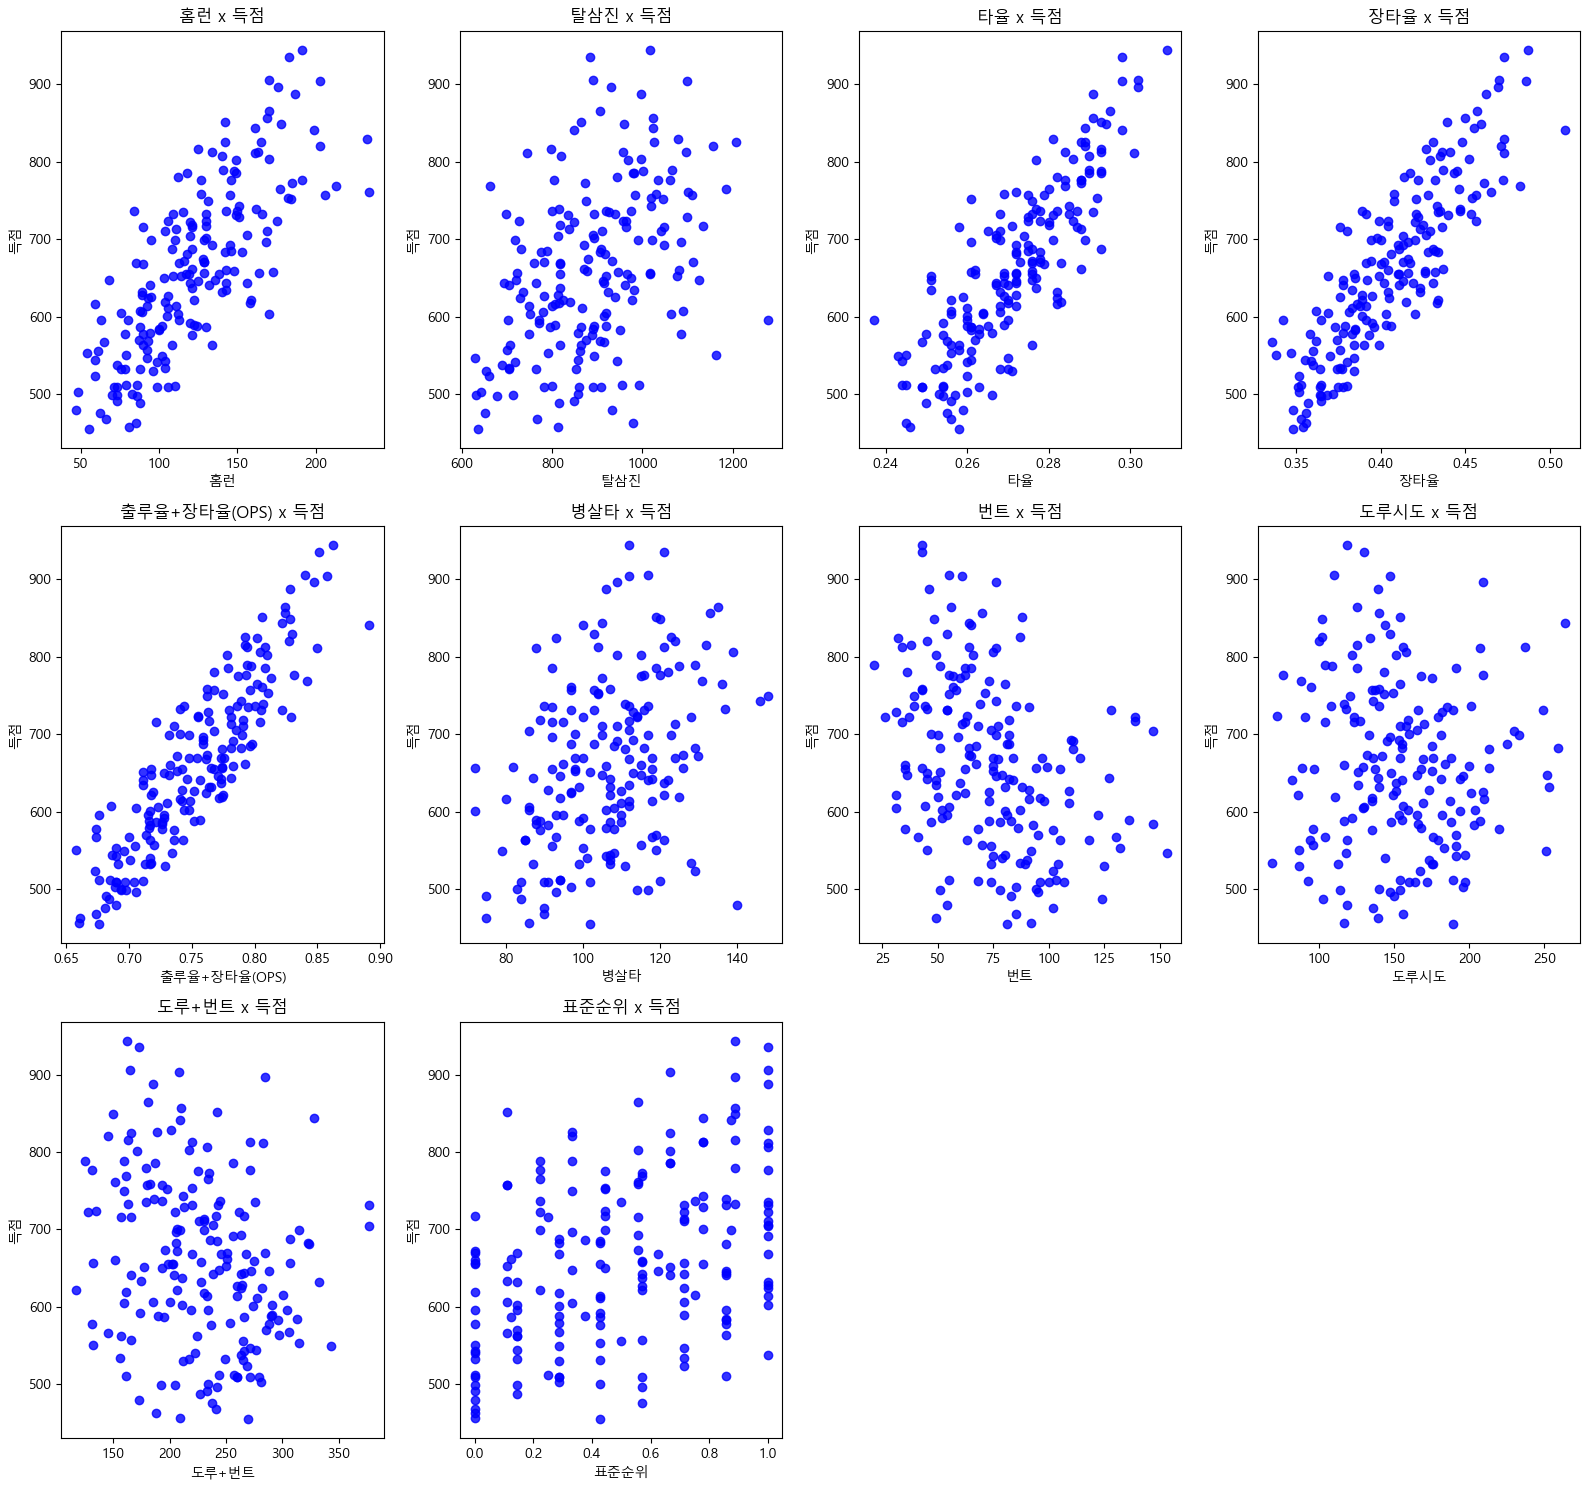

In [ ]:
# 그래프를 생성할 변수들
runs_x_vars = ['홈런', '탈삼진', '타율', '장타율', '출루율+장타율(OPS)',
               '병살타', '번트', '도루시도', '도루+번트', '표준순위']
runs_y_var = '득점'

# subplot 설정
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 15))

# 산점도 그래프 생성
for i, runs_x_var in enumerate(runs_x_vars[:10]):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    ax.scatter(kbo_bt[runs_x_var], kbo_bt[runs_y_var], c='blue', alpha=0.8)
    ax.set_xlabel(runs_x_var)
    ax.set_ylabel(runs_y_var)
    ax.set_title(f'{runs_x_var} x {runs_y_var}')

# 빈 그래프 숨기기
for i in range(len(runs_x_vars), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**번트, 도루 지표에서만 유일하게 음의 상관관계 발생**

### 상관관계 분석 (표준순위 - 모든 지표)
- 팀 성적을 수치화한 표준순위를 기준으로 계산

In [ ]:
# 표준순위와 다른 지표 간의 상관계수 계산
corr_with_rank = kbo_bt.corr()['표준순위']

print(corr_with_rank)

연도             -0.000220
득점              0.422526
홈런              0.264056
탈삼진            -0.204484
타율              0.415910
장타율             0.387192
출루율+장타율(OPS)    0.454158
병살타             0.028170
번트              0.039077
도루시도            0.168081
도루+번트           0.149669
순위             -0.976593
표준순위            1.000000
Name: 표준순위, dtype: float64


C:\Users\NT551_11TH\AppData\Local\Temp\ipykernel_9032\1698631174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_rank = kbo_bt.corr()['표준순위']


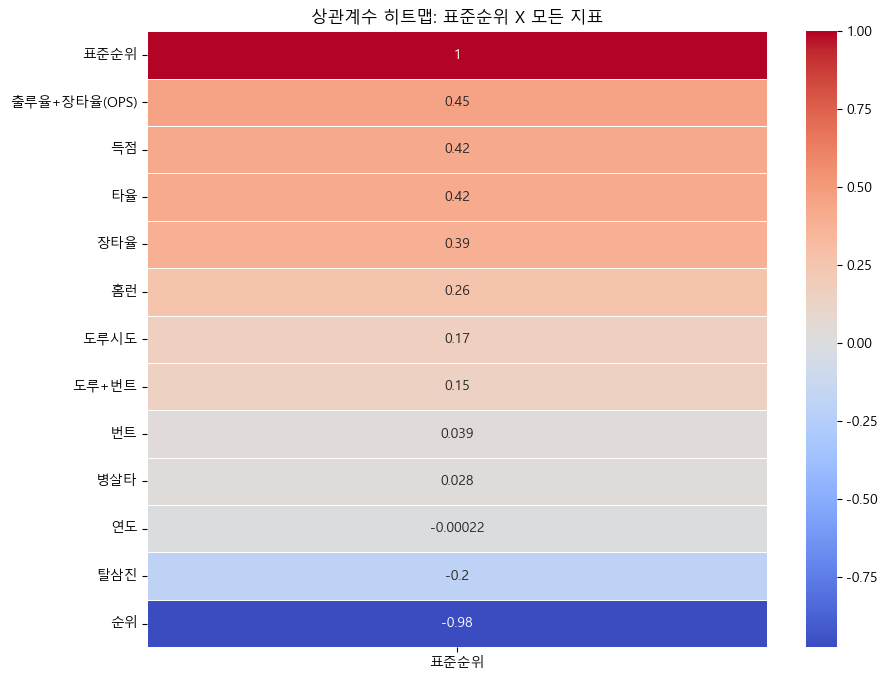

In [ ]:
# 상관계수를 절댓값을 기준으로 내림차순으로 정렬
corr_with_rank_sorted = corr_with_rank.sort_values(ascending=False)

# 상관계수 히트맵 생성(표준 순위 - 모든 지표)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_rank_sorted.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('상관계수 히트맵: 표준순위 X 모든 지표')
plt.show()

**마찬가지로 표준순위 또한 번트, 도루 지표와 매우 낮은 양의 상관관계를 가짐**

**상관관계 분석 결과**
- 스몰볼의 대표적 지표인 번트와 도루는 다른 어떤 지표들 보다도 낮은 기대득점값과 기대순위를 가짐
- 부정적 지표인 삼진과 병살타 조차도 번트, 도루와 상관계수가 비슷하거나 높음
- 반면 빅볼의 대표적인 지표인 장타율과 홈런은 비교적 높은 상관계수를 가짐

**전체 표본을 대상으로 분석했을 때 스몰볼은 빅볼보다 비효율적**

**BUT**  
번트 + 도루가 평균에 수렴하는 경우 빅볼과 스몰볼로 나누기에 부적절  
**=> 평균에 수렴하는 팀을 제외하고 번트+도루 횟수가 많은 상위팀과 하위팀을 추출한뒤 빅볼과 스몰볼로 정의하여 비교**

### 표본 추출, 그룹 나누기
- 번트 + 도루시도의 횟수에 따라 빅볼팀과 스몰볼팀으로 분리

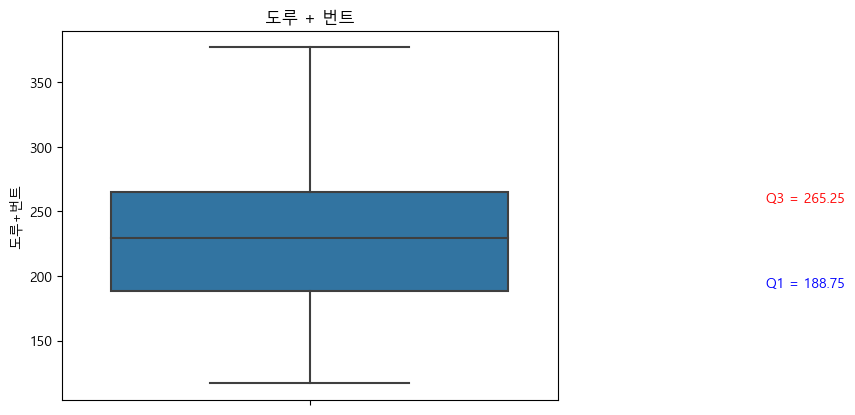

In [ ]:
# 박스플롯으로 시각화
sns.boxplot(data=kbo_bt, y='도루+번트', showfliers=True)
plt.title('도루 + 번트')

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = kbo_bt['도루+번트'].quantile(0.25)
Q3 = kbo_bt['도루+번트'].quantile(0.75)

# 박스플롯 위에 Q1과 Q3 텍스트로 추가
plt.text(1, Q1, f'Q1 = {Q1:.2f}', ha='center', va='bottom', color='blue')
plt.text(1, Q3, f'Q3 = {Q3:.2f}', ha='center', va='top', color='red')

plt.show()

- 이상치 존재 X
- 박스 안에 포함되는 팀 제외(중앙 50% 범위)
- 스몰볼팀을 제3사분위수 이상, 빅볼팀을 1사분위 수 이하로 설정

In [ ]:
# 스몰볼 팀 (도루+번트가 3사분위수 이상)
smallball_teams = kbo_bt[kbo_bt['도루+번트'] >= Q3]

print(smallball_teams[['연도', '구단명', '도루+번트']])

       연도               구단명  도루+번트
54   2016      Nexen Heroes  271.0
57   2016      Lotte Giants  271.0
61   2015     Samsung Lions  285.0
62   2015          NC Dinos  328.0
65   2015     Hanwha Eagles  266.0
71   2014     Samsung Lions  283.0
73   2014        SK Wyverns  276.0
79   2013      Doosan Bears  315.0
81   2013      Nexen Heroes  272.0
82   2013          LG Twins  301.0
83   2013        SK Wyverns  290.0
84   2013        Kia Tigers  266.0
89   2012        SK Wyverns  297.0
90   2012        Kia Tigers  315.0
91   2012      Nexen Heroes  343.0
92   2012          LG Twins  277.0
93   2012      Doosan Bears  269.0
94   2012      Lotte Giants  279.0
98   2011     Samsung Lions  282.0
100  2011        SK Wyverns  313.0
102  2011     Hanwha Eagles  306.0
106  2010        SK Wyverns  377.0
107  2010          LG Twins  307.0
108  2010     Samsung Lions  324.0
109  2010        Kia Tigers  278.0
110  2010      Nexen Heroes  286.0
111  2010     Hanwha Eagles  266.0
112  2009        SK 

In [ ]:
smallball_teams.info() # 46개 팀

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 54 to 183
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연도            46 non-null     int64  
 1   구단명           46 non-null     object 
 2   득점            46 non-null     int64  
 3   홈런            46 non-null     int64  
 4   탈삼진           46 non-null     int64  
 5   타율            46 non-null     float64
 6   장타율           46 non-null     float64
 7   출루율+장타율(OPS)  46 non-null     float64
 8   병살타           46 non-null     int64  
 9   번트            46 non-null     int64  
 10  도루시도          46 non-null     float64
 11  도루+번트         46 non-null     float64
 12  순위            46 non-null     float64
 13  표준순위          46 non-null     float64
dtypes: float64(7), int64(6), object(1)
memory usage: 5.4+ KB


In [ ]:
# 빅볼팀 (도루+번트가 1사분위수 이하)
bigball_teams = kbo_bt[kbo_bt['도루+번트'] <= Q1]

print(bigball_teams[['연도', '구단명', '도루+번트']])

       연도            구단명  도루+번트
1    2021   Doosan Bears  163.0
2    2021   Lotte Giants  128.0
3    2021  Kiwoom Heroes  157.0
7    2021       LG Twins  177.0
9    2021     Kia Tigers  145.0
10   2020       NC Dinos  185.0
11   2020   Doosan Bears  163.0
13   2020       LG Twins  171.0
14   2020  Kiwoom Heroes  183.0
15   2020   Lotte Giants  160.0
16   2020     Kia Tigers  135.0
18   2020     SK Wyverns  175.0
19   2020  Hanwha Eagles  132.0
20   2019  Kiwoom Heroes  179.0
21   2019   Doosan Bears  179.0
28   2019     Kia Tigers  160.0
29   2019   Lotte Giants  131.0
30   2018   Doosan Bears  162.0
31   2018     Kia Tigers  181.0
33   2018   Nexen Heroes  166.0
34   2018   Lotte Giants  145.0
35   2018       LG Twins  160.0
37   2018         KT Wiz  180.0
39   2018       NC Dinos  152.0
40   2017     Kia Tigers  165.0
41   2017   Doosan Bears  150.0
42   2017   Nexen Heroes  125.0
43   2017       NC Dinos  187.0
44   2017     SK Wyverns  152.0
50   2016   Doosan Bears  173.0
74   201

In [ ]:
bigball_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 176
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연도            46 non-null     int64  
 1   구단명           46 non-null     object 
 2   득점            46 non-null     int64  
 3   홈런            46 non-null     int64  
 4   탈삼진           46 non-null     int64  
 5   타율            46 non-null     float64
 6   장타율           46 non-null     float64
 7   출루율+장타율(OPS)  46 non-null     float64
 8   병살타           46 non-null     int64  
 9   번트            46 non-null     int64  
 10  도루시도          46 non-null     float64
 11  도루+번트         46 non-null     float64
 12  순위            46 non-null     float64
 13  표준순위          46 non-null     float64
dtypes: float64(7), int64(6), object(1)
memory usage: 5.4+ KB


###  표본 검사
- 빅볼팀으로 분류된 팀들이 빅볼 야구의 특성을 가지고 있는지 검사
- 빅볼 야구의 특징(낮은 도루 시도, 번트, 비교적 높은 장타율, 홈런, 삼진율, 병살타율)

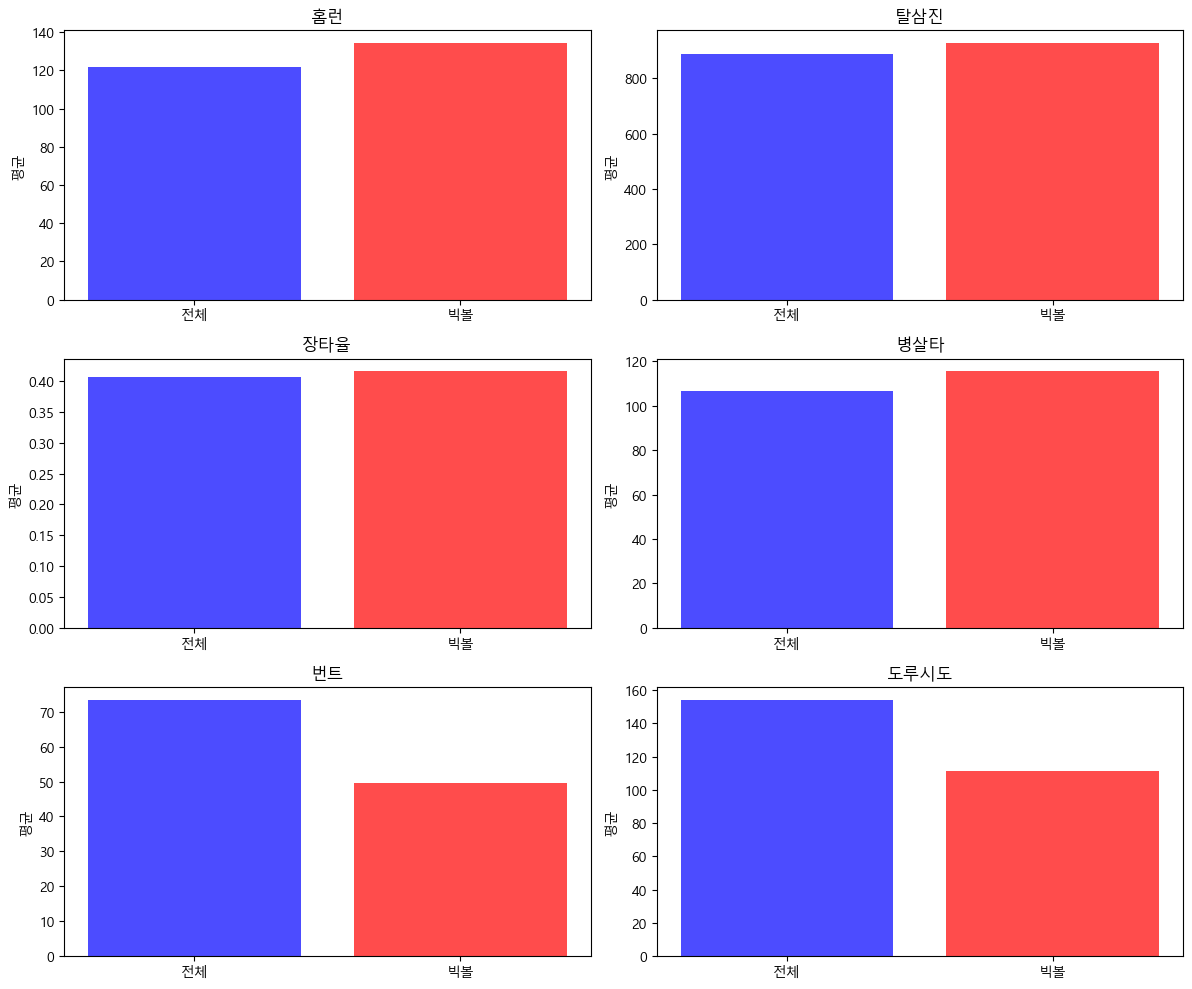

In [ ]:
# 비교할 지표 목록
compare_metrics = ['홈런', '탈삼진', '장타율', '병살타', '번트', '도루시도']

# 서브플롯 생성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
colors = ['blue', 'red']

for i, compare_metric in enumerate(compare_metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # 전체 표본과 스몰볼 비구사 팀의 평균 비교
    avg_all = kbo_bt[compare_metric].mean()  # 전체 표본의 평균
    avg_nop = bigball_teams[compare_metric].mean()  # 스몰볼 비구사 팀의 평균

    ax.bar(['전체', '빅볼'], [avg_all, avg_nop], color=colors, alpha=0.7)
    ax.set_title(compare_metric)
    ax.set_ylabel('평균')

plt.tight_layout()
plt.show()

**평균 보다 높은 장타율, 홈런개수, 탈삼진, 병살타, 평균보다 낮은 번트, 도루시도**  
=> 빅볼팀으로 정의할 수 있는 타당성

### 표본 분석

- 빅볼팀과 스몰볼 팀의 지표 비교

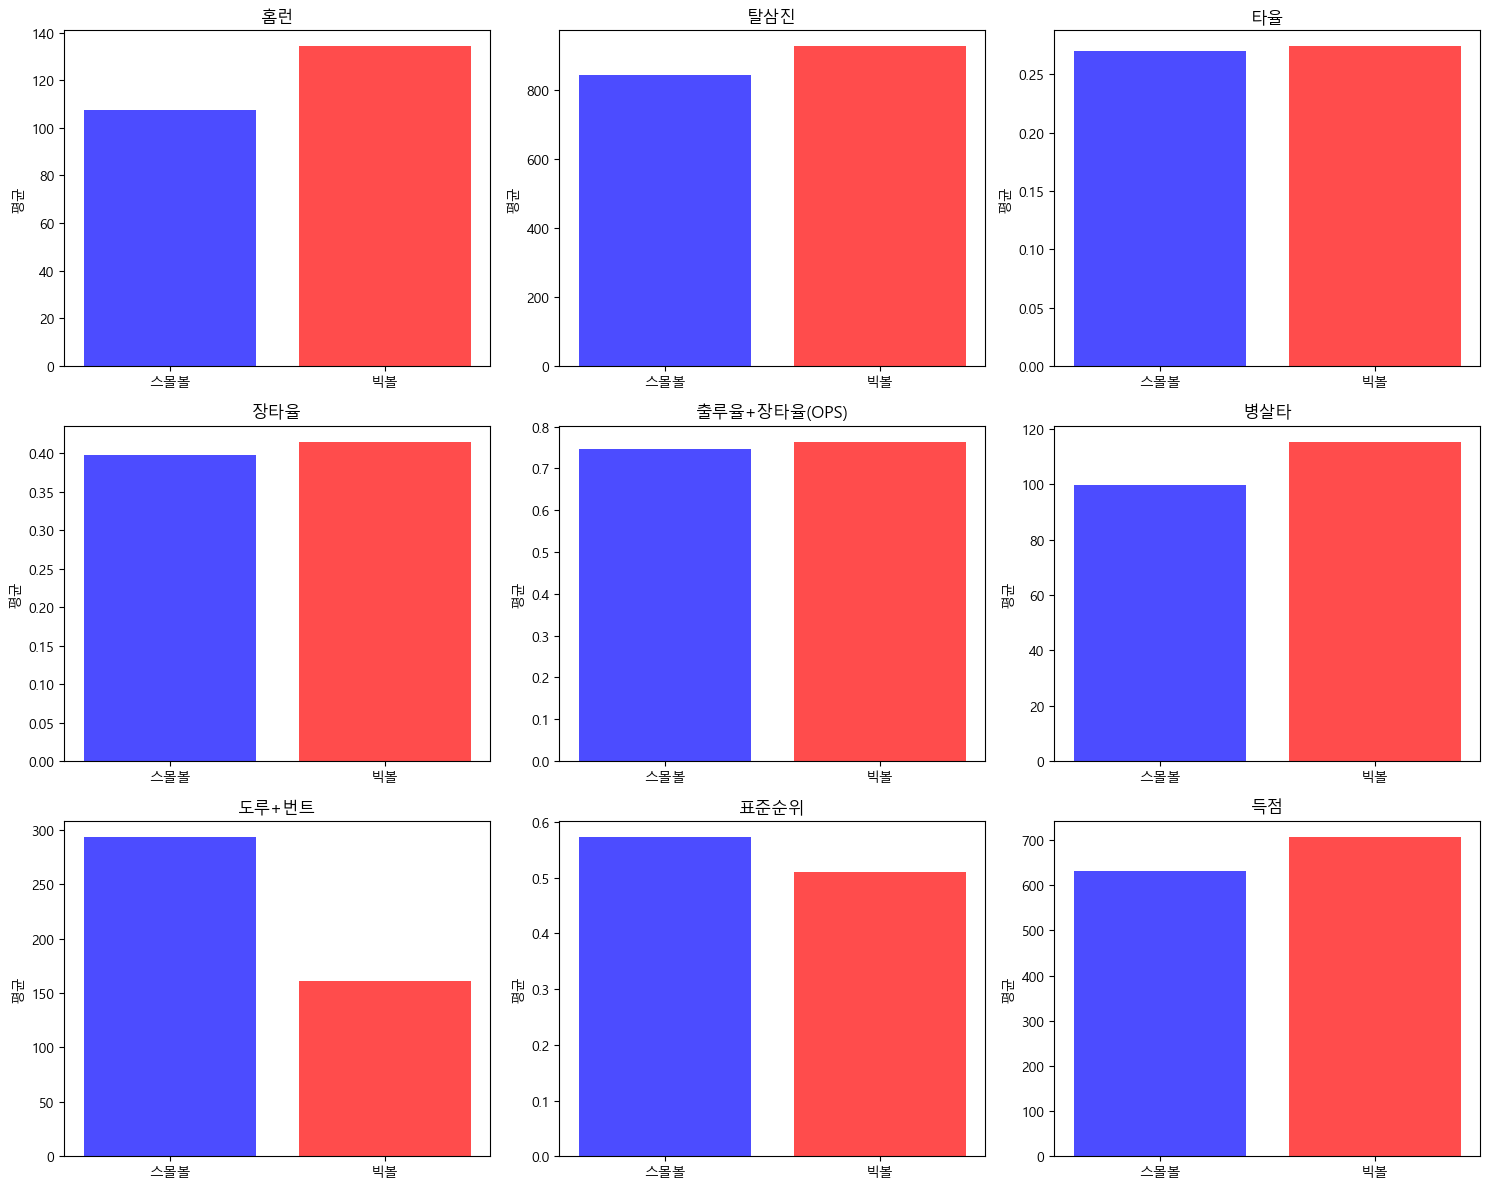

In [ ]:
# 비교할 지표 목록
metrics = ['홈런', '탈삼진', '타율', '장타율', '출루율+장타율(OPS)',
           '병살타', '도루+번트', '표준순위', '득점']

# 서브플롯으로 평균 비교 (3x2 서브플롯)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
colors = ['blue', 'red']  # 전체 표본과 스몰볼 비구사 팀의 색상

for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # 전체 표본과 스몰볼 비구사 팀의 평균 비교
    avg_all = smallball_teams[metric].mean()  # 전체 표본의 평균
    avg_nop = bigball_teams[metric].mean()  # 스몰볼 비구사 팀의 평균

    ax.bar(['스몰볼', '빅볼'], [avg_all, avg_nop], color=colors, alpha=0.7)
    ax.set_title(metric)
    ax.set_ylabel('평균')

plt.tight_layout()
plt.show()

**결론**
- 빅몰팀과 스몰볼팀의 타율과 OPS는 거의 차이가 없음
- 빅볼팀이 스몰볼팀보다 득점값이 높음
- 하지만 20년간의 표준순위는 스몰볼팀이 더 우수

## 추가 분석 내용

### 연도에 따른 빅볼과 스몰볼의 유행

**빅볼과 스몰볼 팀의 연도별 표준 순위**

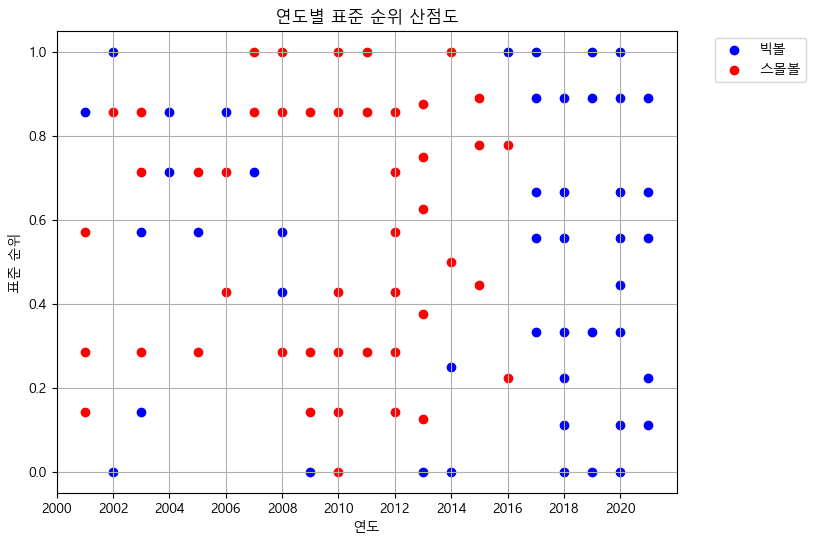

In [ ]:
# 빅볼팀과 스몰볼팀의 연도별 산점도 그래프를 그립니다.
plt.figure(figsize=(8, 6))

# 빅볼 (파란색)
plt.scatter(bigball_teams['연도'], bigball_teams['표준순위'], color='blue', label='빅볼')

# 스몰볼 (빨간색)
plt.scatter(smallball_teams['연도'], smallball_teams['표준순위'], color='red', label='스몰볼')

plt.xlabel('연도')
plt.ylabel('표준 순위')
plt.title('연도별 표준 순위 산점도')
plt.legend()
plt.grid(True)

# 범례 위치를 그래프 밖으로
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 연도를 2씩 증가
plt.xticks(range(2000, 2021, 2))

plt.show()

**연도별로 다른 빅볼팀과 스몰볼팀의 분포**  
- 빅볼(17 ~ 21), 스몰볼(08~16)  
- 높은 성적(1.0에 수렴)을 기록한 연도도 마찬가지

**=> 빅볼과 스몰볼의 유행이 존재한다는 것을 알 수 있음**